<a href="https://colab.research.google.com/github/MohamedKKhalaf/ImageProcessingLab/blob/main/Image_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math

### Task 1

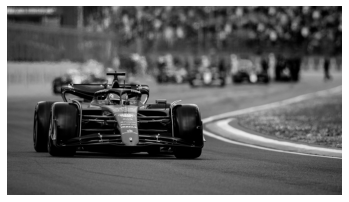

In [ ]:
image = cv.imread('f1.jpg')
gray_image = cv.imread('f1.jpg')
plt.axis('off')
plt.imshow(image, cmap = 'gray');

## Edge detection

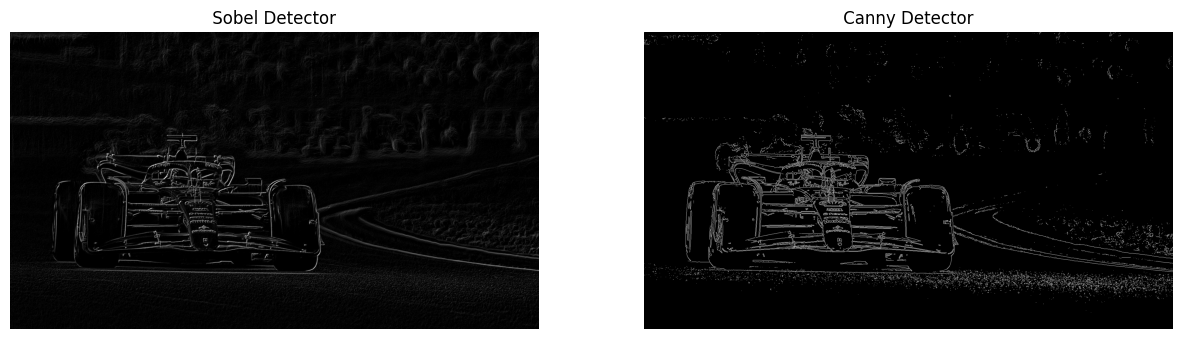

In [ ]:
# Sobel edge detection
sobel_x = cv.Sobel(gray_image , -1 , 1 , 0)
sobel_y = cv.Sobel(gray_image , -1 , 0 , 1)
Sobel = cv.addWeighted(sobel_x , 0.5 , sobel_y , 0.5 , 0)

# canny edge detection
canny = cv.Canny(gray_image , 100 , 100)

plt.figure(figsize=(15,10) , dpi=100)
ax = plt.subplot(1 , 2 , 1)
plt.axis('off')
plt.title(" Sobel Detector ")
plt.imshow(Sobel , cmap='gray');


ax = plt.subplot(1 , 2 , 2)
plt.axis('off')
plt.title(" Canny Detector ")
plt.imshow(canny , cmap='gray');


## Hough Transform

In [ ]:
def Hough_Transform(image):
    # p and Theta ranges
    width ,  height = image.shape
    D = int(round(math.sqrt(width * width + height * height)))   # max_distance
    p = np.arange(-D, D + 1, 1)
    thetas = np.deg2rad(np.arange(-90, 90, 1))

    # Cache some resuable values
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)

    # Hough accumulator array of theta vs p
    accumulator = np.zeros((len(p), len(thetas)), dtype=np.uint64)
    y_idxs, x_idxs = np.nonzero(image)  # (row, col) indexes to edges

    # Vote in the hough accumulator
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]

        for t_idx in range(len(thetas)):
            # Calculate p . diag_len is added for a positive index
            p_val = int( x * cos_t[t_idx] + y * sin_t[t_idx] + D )
            accumulator[p_val, t_idx] += 1

    return accumulator, thetas, p

In [ ]:
def show_Hough_Transform(image, accumulator, thetas, p, save_path=None):
    plt.figure(figsize=(15,10) , dpi=100)
    plt.imshow( accumulator, cmap='jet')
    plt.title('Hough transform')
    plt.xlabel('Angles (degrees)')
    plt.ylabel('Distance (pixels)')
    plt.axis('image')
    plt.tight_layout()
    plt.show()

    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight')

In [ ]:
accumulator, thetas, p = Hough_Transform(canny)

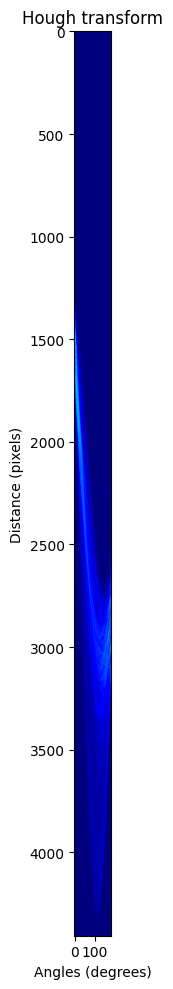

In [ ]:
show_Hough_Transform(canny , accumulator , thetas , p )

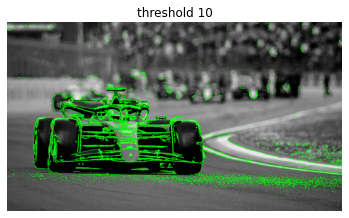

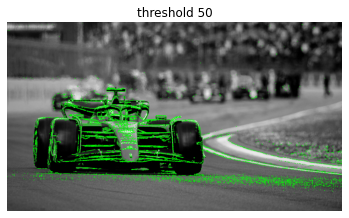

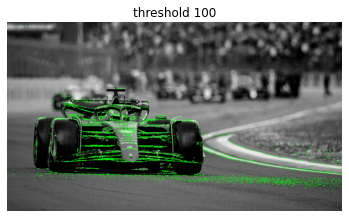

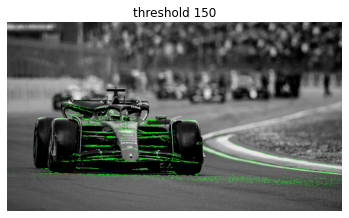

In [ ]:
#canny
threshold = [10 , 50 , 100 , 150]
for i in range(4):
    lines = cv.HoughLinesP(canny , rho = 1 , theta = 1*np.pi/180 , threshold = threshold[i] )
    image = cv.imread('f1.jpg')
    for line in lines:
        x1 , y1 , x2 , y2 = line[0]
        cv.line(image , (x1,y1) , (x2,y2) , (0,255,0) , 2)
    plt.title(f"threshold {threshold[i]}")
    plt.axis('off')
    plt.imshow(image)
    plt.show()

###Task 2


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [ ]:
class Point(object):
    def __init__(self,x,y):
        self.x = x
        self.y = y

    def getX(self):
        return self.x
    def getY(self):
        return self.y

In [ ]:
def getGrayDiff(img , currentPoint , tmpPoint):
    return abs(int(img[currentPoint.x,currentPoint.y]) - int(img[tmpPoint.x,tmpPoint.y]))

def selectConnects(p):
    if p != 0:
        connects = [Point(-1, -1), Point(0, -1), Point(1, -1), Point(1, 0), Point(1, 1), \
        Point(0, 1), Point(-1, 1), Point(-1, 0)]
    else:
        connects = [ Point(0, -1), Point(1, 0),Point(0, 1), Point(-1, 0)]
    return connects

def regionGrow(img , seeds , thresh , p = 1):
    height , weight = img.shape
    seedMark = np.zeros(img.shape)
    seedList = []
    for seed in seeds:
        seedList.append(seed)
    label = 1
    connects = selectConnects(p)
    while(len(seedList) > 0):
        currentPoint = seedList.pop(0)

        seedMark[currentPoint.x,currentPoint.y] = label
        for i in range(8):
            tmpX = currentPoint.x + connects[i].x
            tmpY = currentPoint.y + connects[i].y
            if tmpX < 0 or tmpY < 0 or tmpX >= height or tmpY >= weight:
                continue
            grayDiff = getGrayDiff(img,currentPoint,Point(tmpX,tmpY))
            if grayDiff < thresh and seedMark[tmpX,tmpY] == 0:
                seedMark[tmpX,tmpY] = label
                seedList.append(Point(tmpX,tmpY))
    return seedMark

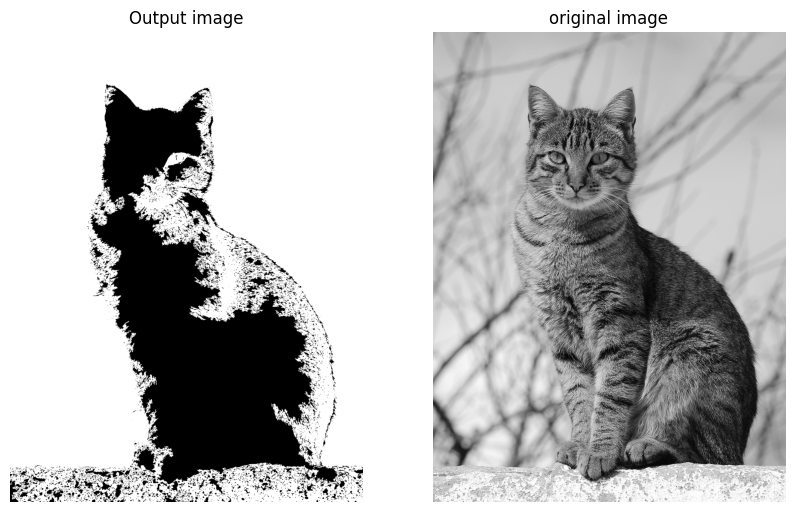

In [ ]:
img = cv2.imread('cat.jpg',0)
seeds = [Point(10,10),Point(82,150),Point(20,300)]
binaryImg = regionGrow( img , seeds , 12)

plt.figure(figsize=(10,10) ,dpi=100)

ax = plt.subplot(1,2,1)
plt.title('Output image')
plt.axis('off')
plt.imshow(binaryImg , cmap='gray');



ax = plt.subplot(1,2,2)
plt.title('original image')
plt.axis('off')
plt.imshow(img , cmap='gray');
